### q1
Write the log likelihood for a multinomial sample and show equation (4.6).
$$
\hat{p}_i=\frac{\sum_t x_i^t}{N}
$$

In a multinomial sample, the outcome of a random event is one of K mutually exclusive and exhaustive states, each of which has a probability of occuring $p_i$ with $\sum^K_{i=1}p_i$. Let $x_1, x_2,...,x_K$ be indicators where $x_i=1$ if the outcome is state $i$ and 0 otherwise.

In one experiment, 
$$
P\left(x_1, x_2, \ldots, x_K\right)=\prod_{i=1}^K p_i^{x_i}
$$
We do $N$ such independent experiments with outcomes $\mathcal{X}=$ $\left\{\boldsymbol{x}^t\right\}_{t=1}^N$ where $\sum_i x_i^t=1$ and
$$
x_i^t= \begin{cases}1 & \text { if experiment } t \text { chooses state } i \\ 0 & \text { otherwise }\end{cases}$$
The constraint is $\sum_i p_i=1$.

### q2
Write the code that generates a normal sample with given $\mu$ and $\sigma$, and the code that calculates $m$ and $s$ from the sample. Do the same using the Bayes’ estimator assuming a prior distribution for $\mu$

### q3
Assume a linear model and then add $0$-mean Gaussian noise to generate a sample. Divide your sample into two as training and validation sets. Use linear regression using the training half. Compute error on the validation set. Do the same for polynomials of degrees 2 and 3 as well. 

In [190]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from random import shuffle
# generate data with a linear model
x = np.arange(0, 1000, 0.1)
shuffle(x)
y = 4*x + 3
# add Gaussian noise, noise~(N(0, 10))
y += np.random.normal(0, 10, len(x))

# train-validate split, 60% for training, 40% for validating
train_x = x[:int(len(x)*0.6)]
train_y = y[:int(len(y)*0.6)]
valid_x = x[int(len(x)*0.6):]
valid_y = y[int(len(y)*0.6):]

# train a linear model
model = LinearRegression()
model.fit(train_x.reshape(-1,1), train_y)
error_train_1 = np.mean((model.predict(train_x.reshape(-1,1)) - train_y)**2)
print(f'Train Error (linear): {error_train_1}')
y_pred = model.predict(valid_x.reshape(-1,1))
error_test_1 = np.mean((y_pred - valid_y)**2)
print(f'Validation Error (linear): {error_test_1}')

# train a polynomial model (degree = 2)
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x.reshape(-1,1))
valid_x_poly = poly.fit_transform(valid_x.reshape(-1,1))
model2 = LinearRegression()
model2.fit(train_x_poly, train_y)
error_train_2 = np.mean((model2.predict(train_x_poly) - train_y)**2)
print(f'\nTrain Error (polynomial, degree=2): {error_train_2}')
y_pred_2 = model2.predict(valid_x_poly)
error_test_2 = np.mean((y_pred_2 - valid_y)**2)
print(f'Validation Error (polynomial, degree=2): {error_test_2}')

# train a polynomial model (degree = 3)
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x.reshape(-1,1))
valid_x_poly3 = poly3.fit_transform(valid_x.reshape(-1,1))
model3 = LinearRegression()
model3.fit(train_x_poly3, train_y)
error_train_3 = np.mean((model3.predict(train_x_poly3) - train_y)**2)
print(f'\nTrain Error (polynomial, degree=3): {error_train_3}')
y_pred_3 = model3.predict(valid_x_poly3)
error_test_3 = np.mean((y_pred_3 - valid_y)**2)
print(f'Validation Error (polynomial, degree=3): {error_test_3}')

Train Error (linear): 99.62212970325035
Validation Error (linear): 101.05000329342418

Train Error (polynomial, degree=2): 99.61329168312504
Validation Error (polynomial, degree=2): 101.08743320197074

Train Error (polynomial, degree=3): 99.61296703776705
Validation Error (polynomial, degree=3): 101.08241042597683


<AxesSubplot:>

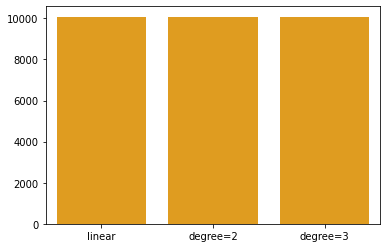

In [185]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# train = [error_train_1, error_train_2, error_train_3]
# validate = [error_test_1, error_test_2, error_test_3]
# sns.barplot(x=['linear', 'degree=2', 'degree=3'], y=train, color='blue')
# sns.barplot(x=['linear', 'degree=2', 'degree=3'], y=validate, color='orange')

### q4
When the training set is small, the contribution of variance to error may be more than that of bias and in such a case, we may prefer a simple model even though we know that it is too simple for the task. Can you give an example?

### q5
Generate a sample from a multivariate normal density $N(\mu, \Sigma)$, calculate $m$ and $S$, and compare them with $\mu$ and $\Sigma$. Check how your estimates change as the sample size changes.

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

In [47]:
mean = [5, 2]
cov = np.array([[6, -3], [-3, 3.5]])
# when sample size equals to 10
sample = np.random.multivariate_normal(mean, cov, 5000)
mean1 = np.mean(sample, axis=0)
cov1 = np.cov(sample.T)
print('mean', mean1)
print('cov', cov1)

mean [5.01694065 2.00090362]
cov [[ 6.08991548 -2.9627677 ]
 [-2.9627677   3.44442192]]


array([[ 8.4675698 , -3.53264726],
       [-3.53264726,  2.81689842]])